## Dia 02/10

### Em progresso

#### Simplificação da utilização das análises

- Transferência da classe Rat para spikeHelper.wrappers
- Criação da classe suporte SpikeDataSet

### Progresso

#### Novo grid search
- Todas as tentativas entre 1500 e 4000, com 10 bins de 100ms entre 200-1200
- Score usado: ($Media-std$) do 10-fold CV
- Demorou umas 16 horas, principalmente o rato 10 ~10 horas
- Obs:
    - <font color='red'>Esqueci de mandar ele guardar todos os resultados, fiquei só com o melhor</font>

In [1]:
import pickle
pickle.load(open('Data/optimalParameters_Mon Oct  2 .pickle','rb'))

,C,Rat,logGamma
1,48.164062,7,-3.623047
1,1.933594,8,-5.010742
1,46.054688,9,-6.658203
1,2.916566,10,-4.357622


#### Limpeza do ambiente de trabalho
- Muitos arquivos ociosos deletados
- Organização deste diário
- $\textbf{Decoder}$ deletado. Continha todas as análises em sua primeira versão (classifier bundle, etc)
- $\textbf{LoadTimes}$ movido para pasta de exemplos. Esse notebook necessita de uma limpeza.

### Pensamentos

- Análises
    - Testar o classificador na decodificação de $\textbf{"quando o rato responderá"}$
    - Calcular resposta esperada do rato baseada em $\textbf{Hazard Rate}$ e $\textbf{Delay Discounting},$ usando a lei de $\textbf{Weber}$ p/ o tempo.
    - Existe um modelo de $\textit{Hidden states}$ que explica bem o comportamento dos ratos? Nesse caso, a atividade neural poderia ser comparada aos hidden states.
    
    
- Exploração:
    - Observar distribuição dos dados comportamentais condicionados à: 
        - Duração da tentativa anterior
        - Recompensa na tentativa anterior
        - ITI
        -  $\textit{Feitos em exploração do comportamento}$
    - Agrupar atividade por previsão
        - Observar como são todas as tentativas previstas como e.g. 3
        
    
- PCAevo: o que significa o componente principal em um unico neurônio, com as dimensões sendo os tempos? E sua evolução?
    - Nota: Caso não signifique nada, apagar o arquivo.

---

## Dia 03/10

### Estudo

#### Dayan & Abott - Cap. 1
###### Páginas: 5 a 46

###### Estimação da taxa de disparo

- Kernel Gaussiano: Não-causal
    - $w(\tau) = \frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{\tau^2}{2\sigma^2}}$
- Função $\alpha$: Causal
    - $w(\tau) = [\alpha^2\tau ^{-\alpha \tau}]_+$
        

###### Spike triggered average

- Mean stimulus a time $\tau$ before spike

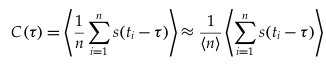

###### Tuning function

- Gaussiana
    - V1
    - Ângulo da barra
- Cosseno
    - M1
    - Ângulo do movimento
- Sigmoide
    - V1
    - Retinal disparity
        

###### Poisson process

- Event occurrence independent on history
- Good aproximation to neuron firing - Firing rate r
- Fano factor:
    - $F$ = Variance/Mean = 1
    
    
    
- $\textbf{InterSpikeInterval}$ (ISI) 
    - Distribution = $re^{-rt}$
    - $C_v$ = 1 ( Homogeneous )

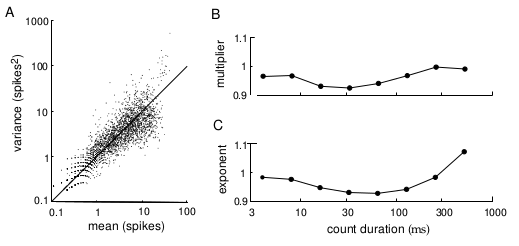
Calculado sobre dados reais fig 1.14

###### Auto-correlation

- Caculated between spike trains-by binning
    - ? Why shouldn't I calculate it with smoothed firing rate?
- Actually autocovariance
- In homogeneous poisson:
    - Uniform distribution

###### Neural code

- Independent spike code vs Correlation code
    - Correlation rarely carries more than 10% information - *How is this calculated?*
    - Common: Combining firing rates without taking correlations into account
        - Hidden independence assumption

- Temporal vs Rate coding
    - or Defined based on activity
        - Temporal coding neuron may be part of a Rate-coding population
    - or Defined based on stimulus
        - Temporal: information carried by r(t) in frequencies higher than the stimulus changes.
    - This choice *matters*

#### Artigo: Neurocomputational models of interval and pattern timing
###### Hardy, Nicholas F., and Dean V. Buonomano. "Neurocomputational models of interval and pattern timing." Current opinion in behavioral sciences 8 (2016): 250-257.
- Stated the difference between simple time estimation tasks and pattern-matching ones.
- Compared three computational models of timing


- Synfire chain
    - Potentially general
    - Traditional approach
        - No recurrence
        - Limited capacity


- Positive feedback (weak)
    - Slow decay
    - Do not require tonic input
        - Local. Intrinsic.
    - Requires reset


- State-dependent computations
    - Temporal information from *hidden states*
        - e.g. Short Term Plasticity
    - Good for interval **and** pattern timing
        
        
The brain has multiple timing mechanisms, and those for interval timing and pattern timing may differ for some tasks, and intertwine in others.


### Pensamentos

- Calculate basic Poisson statistics on data
    - Fano factor
    - ISI distribution
    - ISI $C_v$

---

## Dia 04/10

### Estudo

#### Dayan & Abott - Cap. 2
##### Páginas: 47 a 50

- $r_{est}(t)$ as a Moving Average of the stimulus
    - First Wiener kernel - Kernel
        - Linear
    
- Response in power of the stimulus
    - Functional equivalent to Taylor
    - Volterra expansion
    - Wiener expansion

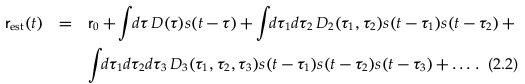
Volterra expansion, p48

- Optimal kernel
    - Easier to compute when stimulus is white noise
    - Computed by data, minimizing squared difference $\frac{1}{T}\int_0^Tdt\cdot(r_{est}(t)-r(t))^2$
    - Firing rate estimation by applying kernel to stimulus
    - Is also __the maximum stimulus__

#### Artigo: Contextual encoding by ensembles of medial prefrontal cortex neurons
###### Hyman, James M., et al. "Contextual encoding by ensembles of medial prefrontal cortex neurons." Proceedings of the National Academy of Sciences 109.13 (2012): 5086-5091.

- Overview:
    - Context decoding
    - Relation between mPFC and HPC CA1
    - Time on task modulates mPFC activity
    - mPFC have a higher-lever context representation
        - May depend
            - Not only on sensory features
            - Also actions
            - Also time

- Métodos:
    - d' (signal detection)
    - Mahalanobis
    - Multi Dimensional Scaling - Visualization
    - Linear Discriminant Analysis - Decoding

### Reunião com Raphael Camargo

- Esclarecer minhas hipóteses
    - A representação do tempo muda com o o passar do aprendizado
    - **A representação dilata e comprime em concordância com o comportamento**
- Ir à reuniões com dúvidas mais pertinentes/mais incisivas

- Comparar performances
    - Separando por duração
    - Não separando
    - ( Para embasar o formato de todas as análises futuras)
- Reduzir a dimensionalidade com PCA e ver a performance
    - Learning curve/n_components_
- Comparar novamente 100 primeiras x 100 ultimas
- Evolução da classificação a partir do treinado nas 100 ultimas
- Correção p-valor

- Olhar LFP
    - Separar células excitatórias e inibitórias

### Pensamentos

###### Sobre a nova organização dos dados:

- Incluir mais maleabilidade:
    - Possibilitar escolher o time-locking: Final ou começo
    - Facilitar a inclusão de outras características das tentativas (custom made)
    - Permitir a escolha do y - a partir de qualquer uma das caracteristicas

###### Other

- Juntar resultados de todos os ratos para **todas** as análises
- Ana's tips:
    - Do **everything** in english
    - Use color codes

---

## Day 05/10

### Studies

#### Dayan & Abott - Cap. 2
###### Pages: 51 - 53

- To make better estimations
    - Optimal kernel is a linear function of stimulus
    - Our neurons/nervous system is nonlinear
    - Add nonlinearity

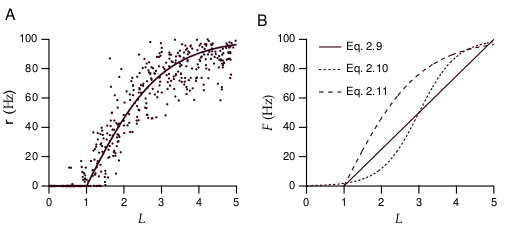

Call our previous *optimal kernel* **L** (the linear term)
$$L(t) = \int_0^{\infty}d\tau D(\tau)s(t-\tau)$$
Another option is to first apply to the stimulus a function such as the response tuning function *f*
$$L(t) = \int_0^{\infty}d\tau D(\tau)f(s(t-\tau))$$
Then we can add a nonlinearity **F** and write 
$$r_{est}(t) = r_0 + F(L(t))$$

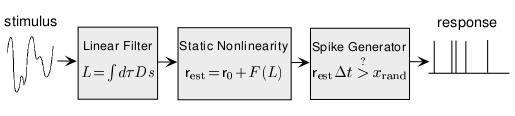
Generative model simulating responses

#### Article: Utilizing the Cortico-Striatal Projectome to Advance the Study of Timing and Time Perception
###### Lusk, N. A., & Buonomano, D. V. (2016). Utilizing the Cortico-Striatal Projectome to Advance the Study of Timing and Time Perception. Timing & Time Perception, 4(4), 411-422.

###### My abstract:
They talk about recent computational neuroanatomy results, which identified 29 functional domains and 11 communities in the Dorsal Striatum/CaudoPutamen, and enabled the explanation of differential time-related activity in the CP, in which a preference to reward-time activity in the lateral CP was related to a domain with higher input from motor areas, while more consistent activity through the trials in the medial CP was localized in domains of high sensory (visual and auditory) input. These subdivisions may also imply the importance of downstream areas such as the Thalamus in temporal processing, and refine models such as the SBF.

###### Methods:
- Review/opinion

### Toughts

- Fernanda's Tip:
    - Make written "non topic" abstract of papers:
        - Pre-ready for later use in projects/papers/reports

### Progress

- Tried to calculate Fano factor, and make a plot similar to the figure 1.14
    - Calculations made with one neuron per time
        - Should I calculate with many neurons together? I think not.
    - There seems to be a cluster of high variance
        - Moving window through data does not equal 'moving interval'
        - May be that those high deviations are because of this window problem
    - The plot shows **deviation** and not **variance**, and the angle it is already higher than $45^o$

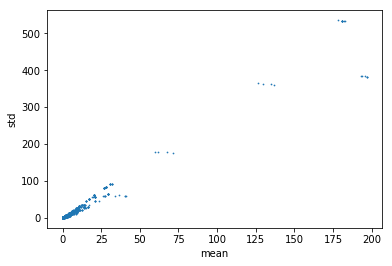
*6/10*
<font color='red'> Chart above is **not** the **fano factor**, as the mean and variance have been calculated on ISI </font>

The mean and variance whose ratio is 1 should be calculated on the **count** of spikes inside an interval.

The method used above, on the other hand, may have relation to the fact that the ISI's coefficient of variation $C_v$ should equal 1 in homogeneouos poisson.


---

## Day 06/10

### Studies

#### Article: Associative learning and timing
###### Kirkpatrick, K., & Balsam, P. D. (2016). Associative learning and timing. Current opinion in behavioral sciences, 8, 181-185.

###### My abstract:
While timing and associative learning are indissociable in current tasks, and modulate one another, it is not clear if they are parts of the same process, really indissociable from a computational point of view.

###### Methods:
Review/opinion

#### Article: Temporal maps and informativeness in associative learning
###### Balsam, P. D., & Gallistel, C. R. (2009). Temporal maps and informativeness in associative learning. Trends in neurosciences, 32(2), 73-78.

###### My abstract:
The strength of association depends on the information carried by the CS about the time of US, which is the the mutual information between their interval distributions $I({US}_{ti};{CS}_{ti})$.    
    
###### Overview:


###### Methods:

### Thoughts
- Learn python's Pandas "timeseries" functionalities is essential.
    - It will surely make analysis and organization easier.

###### Database idea:
- Rat.hdf5
    - Sequential data (spike times e.g. [161, 163, 184, 188...]) / **shape**: (n_neurons, max_n_spikes)
    - Pre-filtered datasets
        - "binSize_kernelWidth "
        - 100_100
        - 100_50
        - norm_100
    - Trial attributes
        - Duration
        - Onset
        - Ending
        - etc


Sequential data:
- Load into pandas DataFrame

Trial attributes:
- Load into pandas DataFrame
    - To later use any [,function of] row[,s]  as selector to trials

Pre-filtered datasets:
- Do not load on memory
    - Access only when using
    - Use some method to easily "batch" data for train / test  / validation

    


---

## Day 7/10

### Studies

#### Dayan & Abott 
###### Pages: 


#### Article: Timing at the Start of Associative Learning
Balsam, P. D., Drew, M. R., & Yang, C. (2002). Timing at the start of associative learning. Learning and Motivation, 33(1), 141-155.

###### My abstract:
They created a specific model for the rat's response, subject to a peak procedure task, simplifying it as a low-high-low response rate, and showed that the best-fit model had no change in peak onset time, only on its height. Their conclusion is that learning the time-structure of events may be a **precursor** to learning to respond.

*08/10:*
One or two training trials in fear conditioning.

###### Methods:
- Experiment
- Model-fitting
- *Review*

#### Article: Timing: An attribute of associative learning
Molet, M., & Miller, R. R. (2014). Timing: an attribute of associative learning. Behavioural processes, 101, 4-14.

###### My abstract:
Second-order behavior (e.g. C1-US / C2-C1 -> C2-CR) is elicited through common elements (in this case C1), but the direct association (C2-CR) only cements when events do occur contiguously, making the CR independent on the original association C1-US, which can only then be extinguished without affecting C2-CR.

Inhibitor stimulus (C3+C1 => $\neg$US) also encode *time* to inhibition.


###### Methods:
- Review (~70 articles)
- Anchored in theory 
    - Temporal coding hypothesis
    - Comparator hypothesis
- Comparison of predictions with results

### Thoughts

- Temporal coding hypothesis
    - Temporal proximity <=> association
    - Temporal relation is encoded in the association
    - This temporal relation shapes responses
    - Common elements bridge maps
    
    
- It seems (in agreement with Tolman) that rewards do not play a central role in associations.
    - Their importance may reside in the motor respose. (or all 'behavioral'?)
    
    
_Tolman, EC. Cognitive maps in rats and men. Psychol. Rev. 55: 189–208 (1948)._

### Planning 
- Compare the evolution of the two distributions **separately**:
    - Non-rewarded trials
    - Rewarded trials
    - Is there correlations between the moving means? <- Why would this be relevant?
    
    
- Fit ARMA model to response durations.
    - May give some insight as to behavior evolution.
    - PyFlux seems to be a easy-to-use tool for timeseries analyis
    
    
- Separate "Theory" and "Methods" in this and subsequent entries of this diary
    - Theory  => Thoughts
    - Methods => Planning
    
###### Database
- Is it possible to make it usable for different eletrophysiological data?
    - Generalize pre-filtering of datasets
        - Enable any function that receives Sequential data [, and kwargs]
        - Provide some elementary ones (filtering and epoching)
    - Deal with two kinds of sequential data
        - Point process
        - Time series
        
        
*Add results*
- Subject.hdf5
    - Sequential
    - Prefiltered *
    - Trial specs *
    - Results
        - Analysis x
        - Analysis y
        - e.g. Confusion matrices
            - .attrs - for plotting and inspection purposes
                - dims : [dim_0_name, dim_1_name,...]
                - dim_i_name : [ label( j, dim_i)  for j in range( len(dim_i) ) ] 
                
- Interaction with results

---

## Day 8/10

### Studies

#### Dayan & Abott 
###### Pages: 


#### Article: The Role of Mental Maps in Decision-Making
Kaplan, R., Schuck, N. W., & Doeller, C. F. (2017). The Role of Mental Maps in Decision-Making. Trends in Neurosciences, 40(5), 256-259.

###### My abstract: 
The mPFC, and in special the OFC, seems to encode all task relevant (and not the irrelevant) information necessary to perform well, predicting performance of subjects in decision tasks, and also awareness of the subject to unspoken relations between stimuli that could assist on the task, i.e. decoding of stimulus from mPFC activity predicted subject's awareness of stimulus importance. Past experiences modulate cognitive map formation in the mPFC by means of Sharp Wave Ripples from the Hippocampus.

###### Methods:
Review (15 articles)

#### Article: Episodic, Semantic, Pavlovian, and Procedural Cognitive Maps
Fernandes, J. J. R., & Holroyd, C. B. (2017). Episodic, Semantic, Pavlovian, and Procedural Cognitive Maps. bioRxiv, 161141.

###### My abstract:
There are four different kinds of cognitive maps in the brain, each with its own kinds of States and Transitions.

###### Methods:
Review (~80 articles)

Theory proposal.

---

## Day 09/10

### Studies

#### Article: The successor representation in human reinforcement learning
Momennejad, I., Russek, E. M., Cheong, J. H., Botvinick, M. M., Daw, N., & Gershman, S. J. (2017). The successor representation in human reinforcement learning. bioRxiv, 083824.

###### My abstract:
Modelling learning of a task, by changing either *Reward* or *State Transition* contingencies, Momennejad et al.(2017) showed that a Successor Representation model outperformed both Model-Free and Model-Based reinforcement learning, specially when coupled to the Model-Based. This means that expected future states are holded *pre-cached*, and action values calculated by the expected rewards by integrating over the expected path. SR is good for reward-revaluation but bad for path-revaluation.

###### Methods:
- Brief theoretical review
    - Presentation of Reinforcement Learning models
        - *Model Free* MF
        - *Model based* MB
        - *Successor Representation* SR
        - *Hybrid SR/MB*
    - Prediction of each model
    - Only *theoretical* discussion
- Experiment execution
    - Two experiments
    - Compare each model's fit
        - Accuracy
        - Reaction time
- Discussion
    - Comparison between model's fits
    - Big picture

Data and code available *upon request*

---

## Day 10/10

### Studies

#### Dayan & Abott 
###### Pages: 


#### Article: Dark Control: A Unified Account of Default Mode Function by Control Theory and Reinforcement Learning

###### My abstract:

###### Methods:


### Thoughts

### Planning

### Results